### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via DT + RF
#

### Iris classification via <b>Decision Trees</b> (here) and Random Forests (below)

This is the whole ML workflow! You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link) as <tt>iris_cleaned.csv</tt>)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

## First, <b>Decision Trees</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,6):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 2  
    yields the highest cv accuracy: 0.9739130434782609

Created and trained a classifier with best_depth = 2


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE:  predict
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :   versicolor versicolor     
row   1 :   versicolor virginica      incorrect
row   2 :   versicolor virginica      incorrect
row   3 :       setosa setosa         
row   4 :       setosa setosa         
row   5 :    virginica virginica      
row   6 :       setosa setosa         
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :       setosa setosa         
row  10 :   versicolor versicolor     
row  11 :    virginica virginica      
row  12 :       setosa setosa         
row  13 :    virginica virginica      
row  14 :       setosa setosa         
row  15 :   versicolor virginica      incorrect
row  16 :    virginica virginica      
row  17 :   versicolor versicolor     
row  18 :    virginica virginica      
row  19 :   versicolor versicolor     
row  20 :    virginica virginica      
row  21 :   versicolor versicolor     
row  22 :   versicolor versicolor     
row  23 :       setosa setosa 

26

Optional: See the Decision tree...

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.667\nsamples = 141\nvalue = [47.0, 46.0, 48.0]\nclass = virginica", fillcolor="#fefdff"] ;
1 [label="gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.5\nsamples = 94\nvalue = [0.0, 46.0, 48.0]\nclass = virginica", fillcolor="#faf7fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor", fillcolor="#4fe88f"] ;
2 -> 3 ;
4 [label="gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]\nclass = virginica", fillcolor="#843ee6"] ;
2 -> 4 ;
{rank=same ; 0} ;
{rank=same ; 2} ;
{rank=same ; 1; 3; 4} ;
}


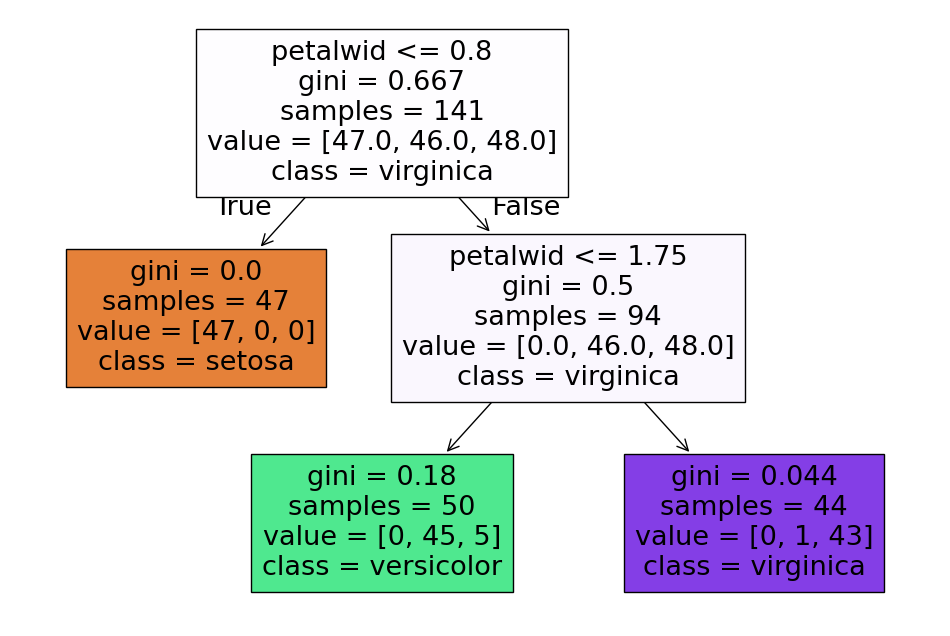

In [ ]:
import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

### Optional:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features, model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [4.2,3.1,2.0,0.4],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1.0,42,4.7,0.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    predicted_species = predictive_model( Features, dtree_model_final )
    name = SPECIES[predicted_species]                          # look up the species
    print(f"From the Features {Features}, I predict : {name}")

From the Features [4.2, 3.1, 2.0, 0.4], I predict : setosa
From the Features [5.8, 2.7, 4.1, 1.0], I predict : versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict : virginica
From the Features [6.7, 3.3, 5.7, 2.1], I predict : virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict : virginica
From the Features [1.0, 42, 4.7, 0.01], I predict : setosa


### Predictive models aren't perfect!
+ Notice that the fourth prediction above is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 4.0
sepalwid = 2.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = dtree_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


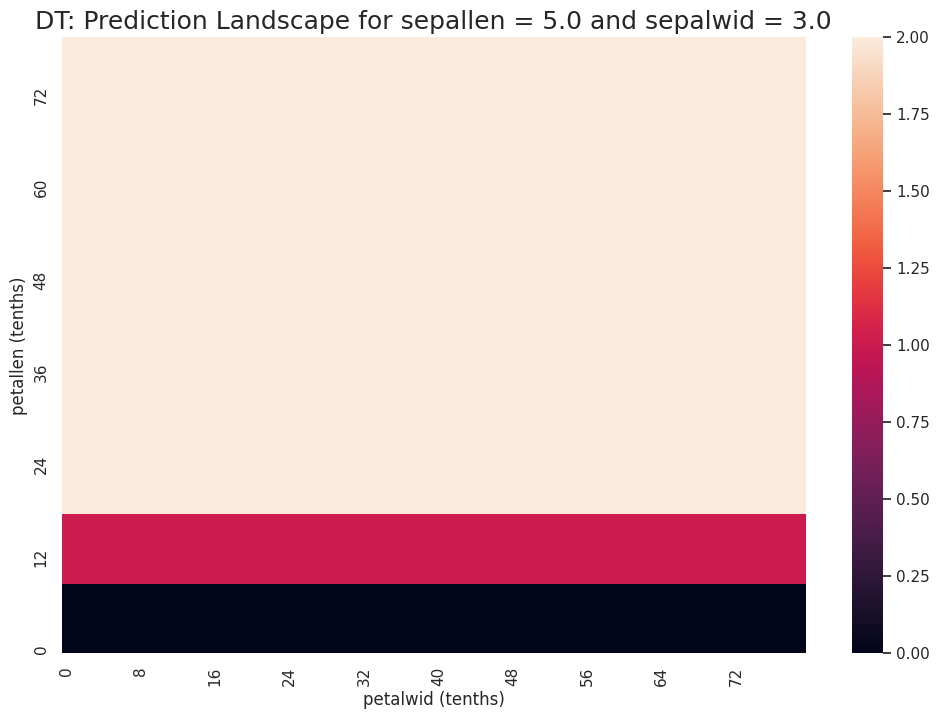

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for sepallen = 5.0 and sepalwid = 3.0", fontsize=18)


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

## Next, <b>Random Forests</b>

Random Forests are simply a LOT of decision trees...

After you have a lot of decision trees, they all vote on how to classify a new input observation!

The Machine Learning workflow is exactly the same: only the algorithm name changes:

### Iris classification via Decision Trees (above) and <b>Random Forests</b> (here)

This is simply a repeat of whole ML workflow, because it's an amazing advantage to have the whole process in mind! (No harm in repeating it here!) You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (you're set - you used it above)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9640
depth:  1 ntrees: 150 cv accuracy:  0.9640
depth:  1 ntrees: 250 cv accuracy:  0.9640
depth:  2 ntrees:  50 cv accuracy:  0.9640
depth:  2 ntrees: 150 cv accuracy:  0.9549
depth:  2 ntrees: 250 cv accuracy:  0.9640
depth:  3 ntrees:  50 cv accuracy:  0.9549
depth:  3 ntrees: 150 cv accuracy:  0.9549
depth:  3 ntrees: 250 cv accuracy:  0.9549
depth:  4 ntrees:  50 cv accuracy:  0.9640
depth:  4 ntrees: 150 cv accuracy:  0.9549
depth:  4 ntrees: 250 cv accuracy:  0.9549
depth:  5 ntrees:  50 cv accuracy:  0.9549
depth:  5 ntrees: 150 cv accuracy:  0.9549
depth:  5 ntrees: 250 cv accuracy:  0.9549
best_depth: 2 and best_num_trees: 50 are our choices. Acc: 0.9640316205533598
Created and trained a classifier with best_depth = 2


One of the forest's trees is DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1368100764)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.652\nsamples = 54\nvalue = [29.0, 17.0, 24.0]\nclass = setosa", fillcolor="#fcf1e9"] ;
1 [label="gini = 0.0\nsamples = 22\nvalue = [29, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petallen <= 5.05\ngini = 0.485\nsamples = 32\nvalue = [0, 17, 24]\nclass = virginica", fillcolor="#dac5f7"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.255\nsamples = 15\nvalue = [0, 17, 3]\nclass = versicolor", fillcolor="#5cea97"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 17\nvalue = [0, 0, 21

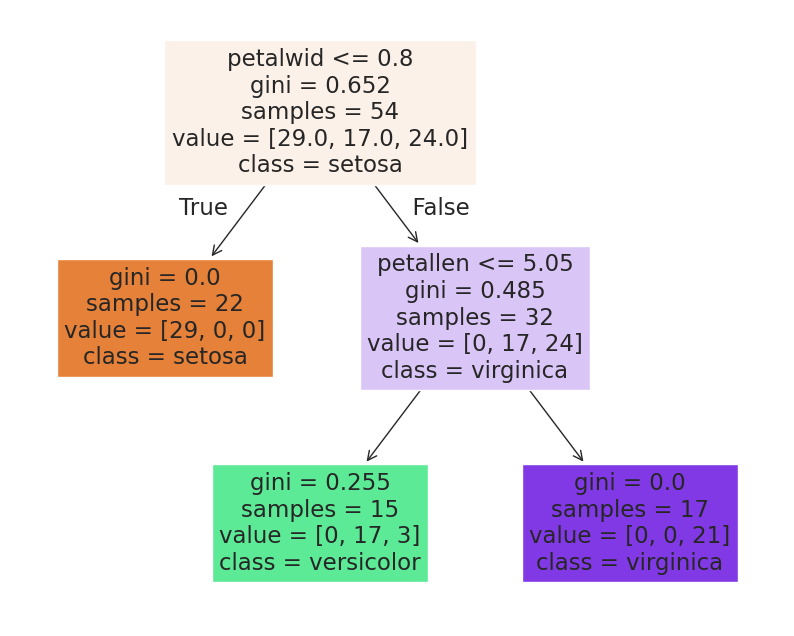

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor


#### We can visualize parameter space...

_for any model_ &nbsp; Let's "see inside" our Random Forest:

+ first by computing all of the predictions in two dimensions
+ then by showing them as a heatmap!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


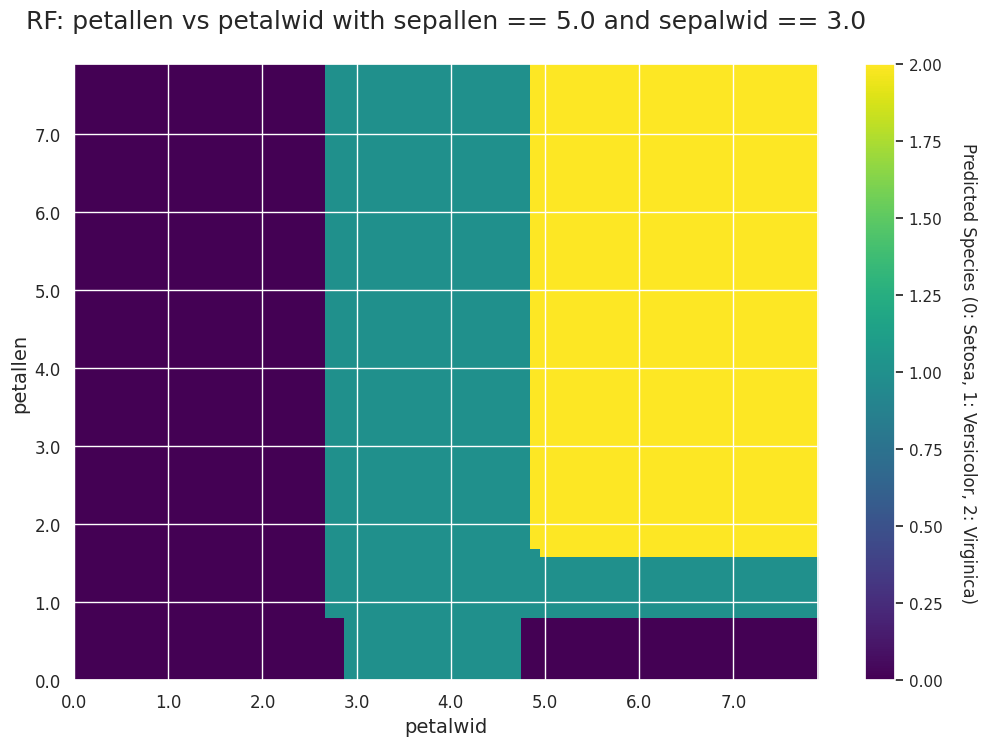

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

ax.set_title(f"RF: petallen vs petalwid with sepallen == {sepallen:.1f} and sepalwid == {sepalwid:.1f}\n", fontsize=18)
# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

The _feature importances_ are probably what it knows the best:

In [ ]:
rforest_model_tuned.feature_importances_

<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a DT+RF model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

# **Part 1:** births_cleaned.csv

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the births dataset
births = pd.read_csv('births_cleaned.csv')

# Set up features and target
X_births = births[['month', 'day']]  # predictors: month and day
y_births = births['popularity']      # target: popularity (0 or 1)

# Split into train and test sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_births, y_births, test_size=0.3, random_state=42)

# 1. Decision Tree Classifier
dt_births = DecisionTreeClassifier(random_state=42)
dt_births.fit(Xb_train, yb_train)

# Predict and evaluate
yb_pred_dt = dt_births.predict(Xb_test)
print("Decision Tree Accuracy (births):", accuracy_score(yb_test, yb_pred_dt))

# 2. Random Forest Classifier
rf_births = RandomForestClassifier(random_state=42)
rf_births.fit(Xb_train, yb_train)

# Predict and evaluate
yb_pred_rf = rf_births.predict(Xb_test)
print("Random Forest Accuracy (births):", accuracy_score(yb_test, yb_pred_rf))


Decision Tree Accuracy (births): 0.8454545454545455
Random Forest Accuracy (births): 0.8727272727272727


both the Decision Tree and Random Forest models achieved relatively high accuracy scores. However, the Random Forest model performed slightly better than the single Decision Tree. This is expected because Random Forests aggregate the predictions of multiple trees which helps to reduce overfitting and improve generalization on unseen data. While the Decision Tree already captures important patterns between birth month/day and popularity, the Random Forest model refines these patterns to deliver better predictive performance.

# **Visualize the Decision Tree**

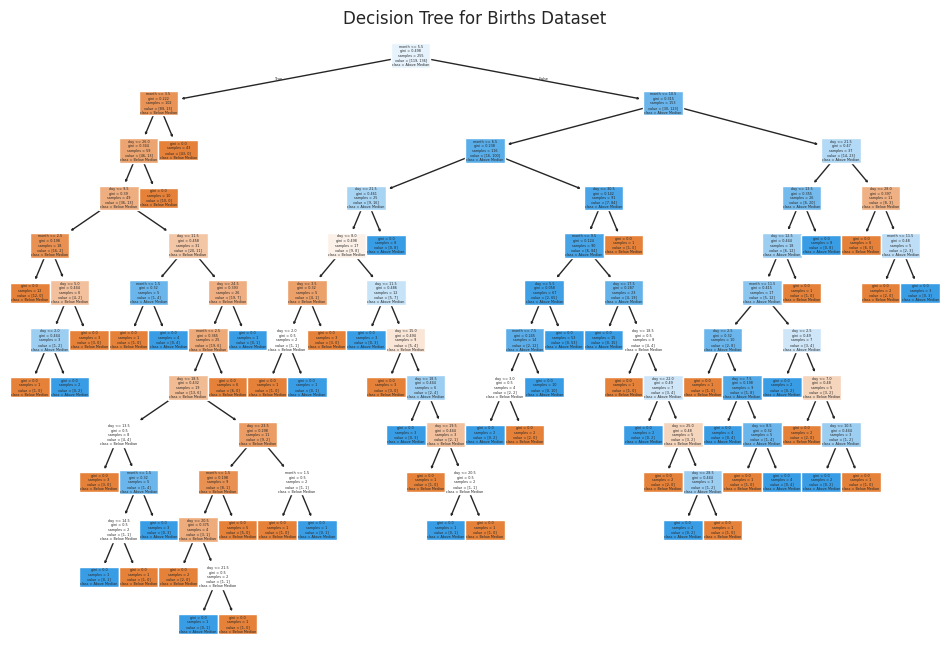

In [ ]:
# Import the visualization libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_births, feature_names=X_births.columns, class_names=['Below Median', 'Above Median'], filled=True)
plt.title("Decision Tree for Births Dataset")
plt.show()


The large size of the Decision Tree for the births dataset is expected. This is due to the high number of discrete possible values (days and months) that the tree can split on, resulting in a complex structure to achieve optimal classification. The highly detailed structure of the births Decision Tree could lead to overfitting, further explaining why the Random Forest approach provides better performance of around 2.7%.

# **Visualize Random Forest**

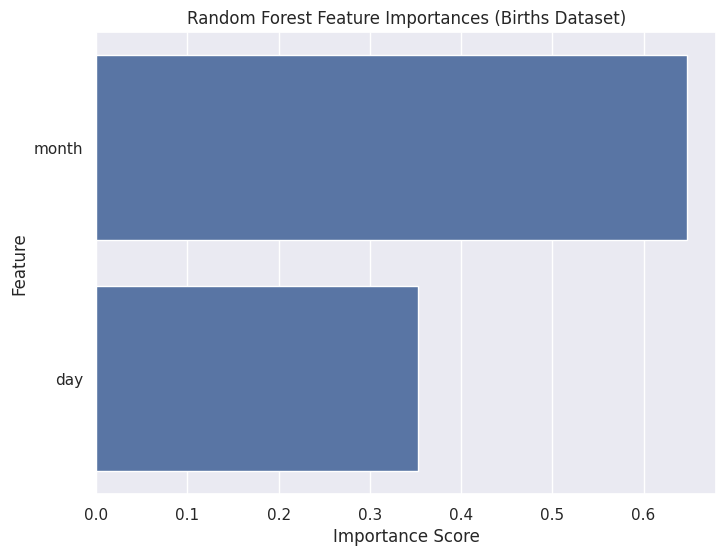

In [ ]:
# Plot feature importances for Random Forest
import seaborn as sns

# Get feature importances
importances_births = rf_births.feature_importances_
features_births = X_births.columns

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=importances_births, y=features_births)
plt.title("Random Forest Feature Importances (Births Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Based on the Random Forest feature importance analysis, the "month" (around 0.65) feature was more influential in predicting popularity compared to the "day" feature (around 0.35). This suggests that certain months may be associated with higher or lower birth popularity trends, while the exact day within the month has a smaller effect.

# **Part 2:** digits_cleaned.csv

In [ ]:
# Load the digits dataset
digits = pd.read_csv('digits_cleaned.csv')

# Set up features and target
X_digits = digits.drop('actual_digit', axis=1)  # drop the target column to get only features
y_digits = digits['actual_digit']               # target: actual_digit (0–9)

# Split into train and test sets
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# 1. Decision Tree Classifier
dt_digits = DecisionTreeClassifier(random_state=42)
dt_digits.fit(Xd_train, yd_train)

# Predict and evaluate
yd_pred_dt = dt_digits.predict(Xd_test)
print("Decision Tree Accuracy (digits):", accuracy_score(yd_test, yd_pred_dt))

# 2. Random Forest Classifier
rf_digits = RandomForestClassifier(random_state=42)
rf_digits.fit(Xd_train, yd_train)

# Predict and evaluate
yd_pred_rf = rf_digits.predict(Xd_test)
print("Random Forest Accuracy (digits):", accuracy_score(yd_test, yd_pred_rf))


Decision Tree Accuracy (digits): 0.8455743879472694
Random Forest Accuracy (digits): 0.9811676082862524


In the digits dataset, the Random Forest classifier significantly outperforms the Decision Tree classifier, achieving an accuracy of over 98% compared to around 85%. This reflects Random Forest’s strength in handling high-dimensional data like pixel arrays, where multiple trees help average out noise and build a more generalizable model.

# **Visualize the Decision Tree**

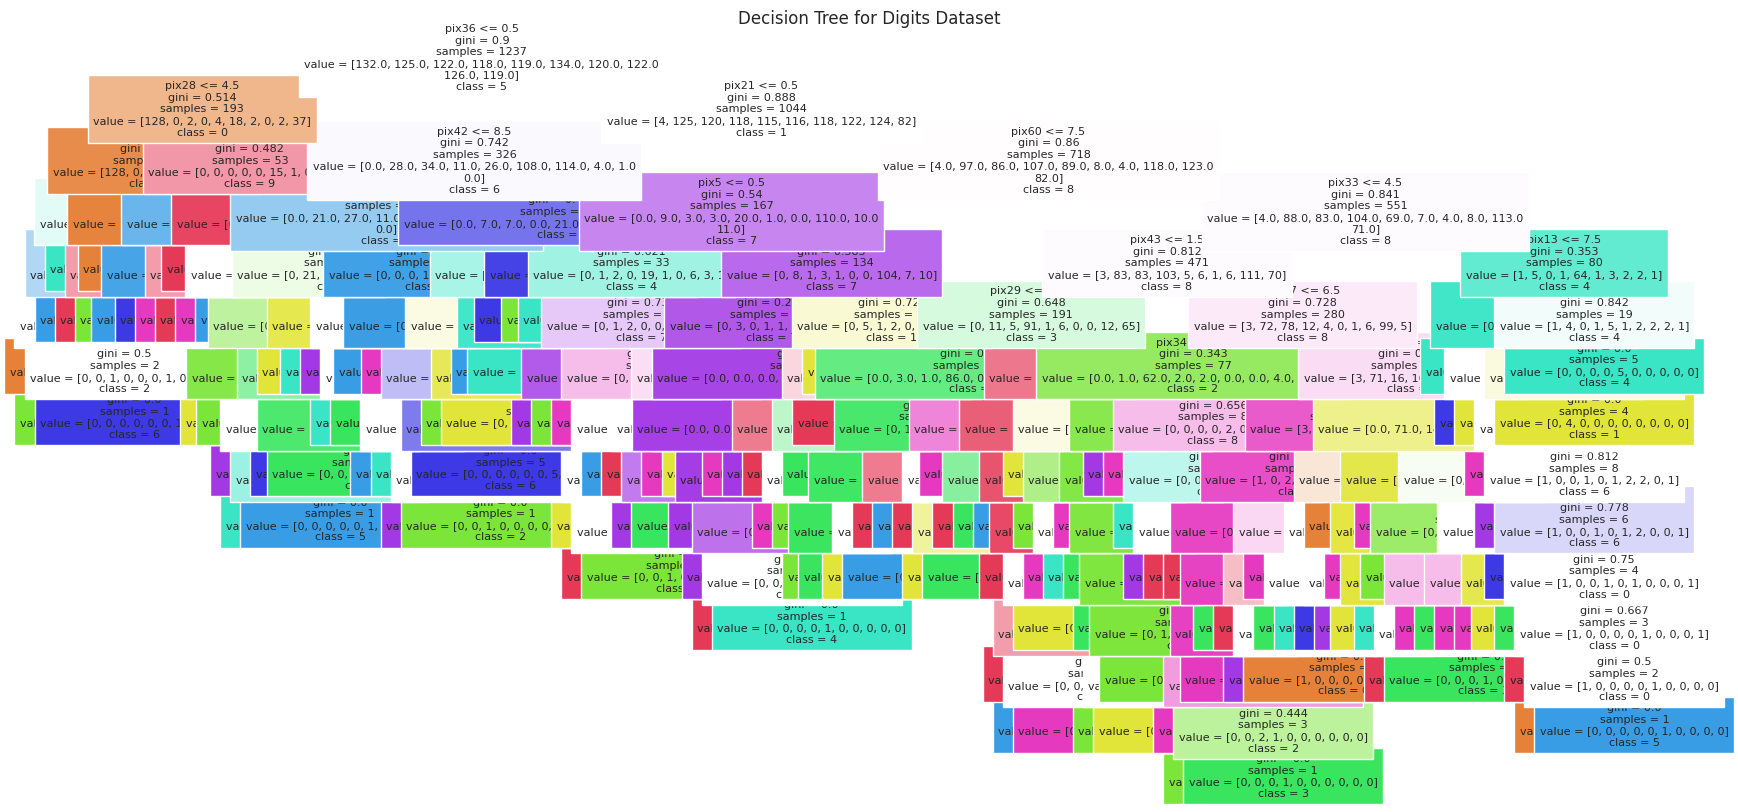

In [ ]:
# Visualization of Decision Tree for Digits Dataset
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_digits,
    feature_names=X_digits.columns,
    class_names=[str(i) for i in range(10)],  # Digits 0 to 9
    filled=True,
    fontsize=8
)
plt.title("Decision Tree for Digits Dataset")
plt.show()


The Decision Tree for the digits dataset is much larger than the one for the births dataset. This is expected because image data (digit recognition) has many features (64 pixels), resulting in deeper and more complex trees to capture important visual patterns for classifying digits from 0 to 9.

# **Visualize Random Forest**

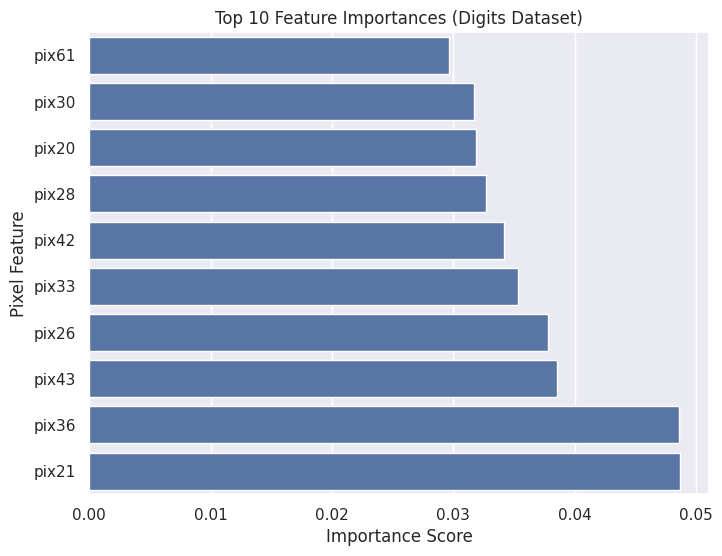

In [ ]:
# Get importances
importances_digits = rf_digits.feature_importances_
features_digits = X_digits.columns

# Sort and get top 10 features
top10_idx = importances_digits.argsort()[-10:]
top10_features = features_digits[top10_idx]
top10_importances = importances_digits[top10_idx]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top10_importances, y=top10_features)
plt.title("Top 10 Feature Importances (Digits Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Pixel Feature")
plt.show()


The Random Forest model identified pixel 21 (pix21) and pixel 36 (pix36) as the two most important features for classifying digits, each with the highest importance scores close to 0.05. Other important pixels included pix43, pix26, and pix33. These top 10 pixels contribute the most to the model’s predictions, indicating that certain pixel regions are especially critical for recognizing handwritten digits.